**Notas para contenedor de docker:**

Comando de docker para ejecución de la nota de forma local:

nota: cambiar `dir_montar` por la ruta de directorio que se desea mapear a `/datos` dentro del contenedor de docker.

```
dir_montar=<ruta completa de mi máquina a mi directorio>#aquí colocar la ruta al directorio a montar, por ejemplo: 
#dir_montar=/Users/erick/midirectorio.
```

Ejecutar:

```
$docker run --rm -v $dir_montar:/datos --name jupyterlab_prope_r_kernel_tidyverse -p 8888:8888 -d palmoreck/jupyterlab_prope_r_kernel_tidyverse:2.1.4   

```

Ir a `localhost:8888` y escribir el password para jupyterlab: `qwerty`

Detener el contenedor de docker:

```
docker stop jupyterlab_prope_r_kernel_tidyverse
```


Documentación de la imagen de docker `palmoreck/jupyterlab_prope_r_kernel_tidyverse:2.1.4` en [liga](https://github.com/palmoreck/dockerfiles/tree/master/jupyterlab/prope_r_kernel_tidyverse).

---

Para ejecución de la nota usar:

[docker](https://www.docker.com/) (instalación de forma **local** con [Get docker](https://docs.docker.com/install/)) y ejecutar comandos que están al inicio de la nota de forma **local**. 

O bien dar click en alguno de los botones siguientes:

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/palmoreck/dockerfiles-for-binder/jupyterlab_prope_r_kernel_tidyerse?urlpath=lab/tree/Propedeutico/R/clases/2_probabilidad/4_probabilidad_condicional.ipynb) esta opción crea una máquina individual en un servidor de Google, clona el repositorio y permite la ejecución de los notebooks de jupyter.

[![Run on Repl.it](https://repl.it/badge/github/palmoreck/dummy)](https://repl.it/languages/Rlang) esta opción no clona el repositorio, no ejecuta los notebooks de jupyter pero permite ejecución de instrucciones de Python de forma colaborativa con [repl.it](https://repl.it/). Al dar click se crearán nuevos ***repl*** debajo de sus users de ***repl.it***.


### Lo siguiente está basado los libros:

### * B. Rumbos, Pensando Antes de Actuar: Fundamentos de Elección Racional, 2009.

### * G. J. Kerns, Introduction to Probability and Statistics Using R, 2014.

### El libro de G. J. Kerns tiene github: [jkerns/IPSUR](https://github.com/gjkerns/IPSUR)

**Notas:**

* Se utilizará el paquete [prob](https://cran.r-project.org/web/packages/prob/index.html) de R para los experimentos descritos en la nota y aunque con funciones nativas de R se pueden crear los experimentos, se le da preferencia a mostrar cómo en R se tienen paquetes para muchas aplicaciones.

* En algunas líneas no es necesario colocar `print` y sólo se ha realizado para mostrar los resultados de las funciones en un formato similar al de R pues la nota se escribió con jupyterlab y R.

* Cuidado al utilizar las funciones del paquete `prob` para construir espacios de probabilidad grandes como lanzar un dado 9 veces... (tal experimento tiene 10 millones de posibles resultados)

In [1]:
options(repr.plot.width=8, repr.plot.height=8) #esta línea sólo se ejecuta para jupyterlab con R

In [2]:
library(prob)
library(ggplot2)

Loading required package: combinat


Attaching package: ‘combinat’


The following object is masked from ‘package:utils’:

    combn


Loading required package: fAsianOptions

Loading required package: timeDate

Loading required package: timeSeries

Loading required package: fBasics

Loading required package: fOptions


Attaching package: ‘prob’


The following objects are masked from ‘package:base’:

    intersect, setdiff, union




# Ejemplos

1) Supongamos que nos hacen la siguiente pregunta: ¿cuál es la probabilidad de obtener un $6$ si lanzamos un dado? La respuesta es simple, si $E$ es el evento {obtener $6$} entonces la probabilidad de obtener un $6$ es: $P(E) = \frac{1}{6}$. Si la pregunta es ¿cuál es la probabilidad de obtener un $6$ dado que el número es par? La respuesta cambia pues ahora el espacio muestral se reduce a $\{2,4,6\}$ y si $F$ es el evento {número par} entonces la probabilidad de tener un $6$ dado que el número es par se denota por: $P(E|F)$ y en este caso es igual a: $P(E|F) = \frac{1}{3}$.

2) Considérese una baraja y los eventos: $E=${primer carta extraída es as} y $F$={segunda carta extraída es as}. Calcular las probabilidades $P(E)$, $P(F|E)$ y $P(F|E^c)$.

3) Iguales enunciados que 1 y 2 pero calcúlese $P(E \cap F)$ en ambos casos.

**Solución:**

1) En el caso del dado, la probabilidad $P(E\cap F)$ puede pensarse como un **producto de probabilidades** que involucran los eventos {obtener $6$} y {el número es par dado que se obtuvo $6$}: $P(E)P(F|E) = \frac{1}{6} \cdot 1$ o bien como el producto $P(F)P(E|F) = \frac{3}{6} \cdot \frac{1}{3}$ {obtener par} y {obtener $6$ dado que se tiene un número par}.

2) $P(E \cap F)$ se puede calcular como:

a) $P(E|F)P(F)$ con eventos en cada probabilidad: $E|F =${primer carta extraída es as dado que se extrajo una segunda carta que es as}, $F=${segunda carta extraída es as}.


In [3]:
3/51*4/52

[1] 0.004524887

b) $P(F|E)P(E)$ con eventos en cada probabilidad: $F|E=$ {segunda carta extraída es as dado que se extrajo una primer carta que es as}, $E=${primer carta extraída es as}.

In [4]:
3/51*4/52

[1] 0.004524887

# Probabilidad condicional

La probabilidad condicional de $F$ dado $E$ se denota como $P(F|E)$ y está definida por:

$$P(F|E) = \frac{P(F \cap E)}{P(E)}, \quad \text{ si } P(E)>0.$$

**Obs:** obsérvese como en los ejemplos anteriores que a partir de esta igualdad se tiene: $P(F \cap E) = P(F|E)P(E)$ si $P(E)>0$.

## Ejemplos

1) **Experimento:** lanzar dos veces una moneda. Sean $E=${sale sol}, $F=${sale sol y águila}. Calcular $P(E), P(F), P(E\cap F), P(E|F), P(F|E)$.

2) **Experimento:** se lanzan dos dados distintos y nos dicen que la suma de los números que se obtuvieron es 7. ¿Cuál es la probabilidad de que los números obtenidos sean 5 y 2? 


### En R ...

**Experimento:** lanzamiento de dos dados distintos de 6 lados. Sean $E=${resultados de ambos dados conciden}, $F=${suma de los resultados es al menos 8}. Calcular $P(E), P(F), P(E\cap F), P(E|F), P(F|E)$.

**Solución:** El espacio de resultados se puede representar como una matriz pues el espacio de resultados es: $S=\{(1,1),(1,2),\dots,(6,6)\}$ y $\#(S)=36$.

In [3]:
S<-rolldie(2)
E<-subset(S, X1 == X2)
F<-subset(S, X1+X2>=8)

In [4]:
E$etiqueta <- rep('X', nrow(E))
F$etiqueta <- rep('O', nrow(F))

In [6]:
E

,X1,X2,etiqueta
,<int>,<int>,<chr>
1,1,1,X
8,2,2,X
15,3,3,X
22,4,4,X
29,5,5,X
36,6,6,X


In [7]:
head(F)

,X1,X2,etiqueta
,<int>,<int>,<chr>
12,6,2,O
17,5,3,O
18,6,3,O
22,4,4,O
23,5,4,O
24,6,4,O


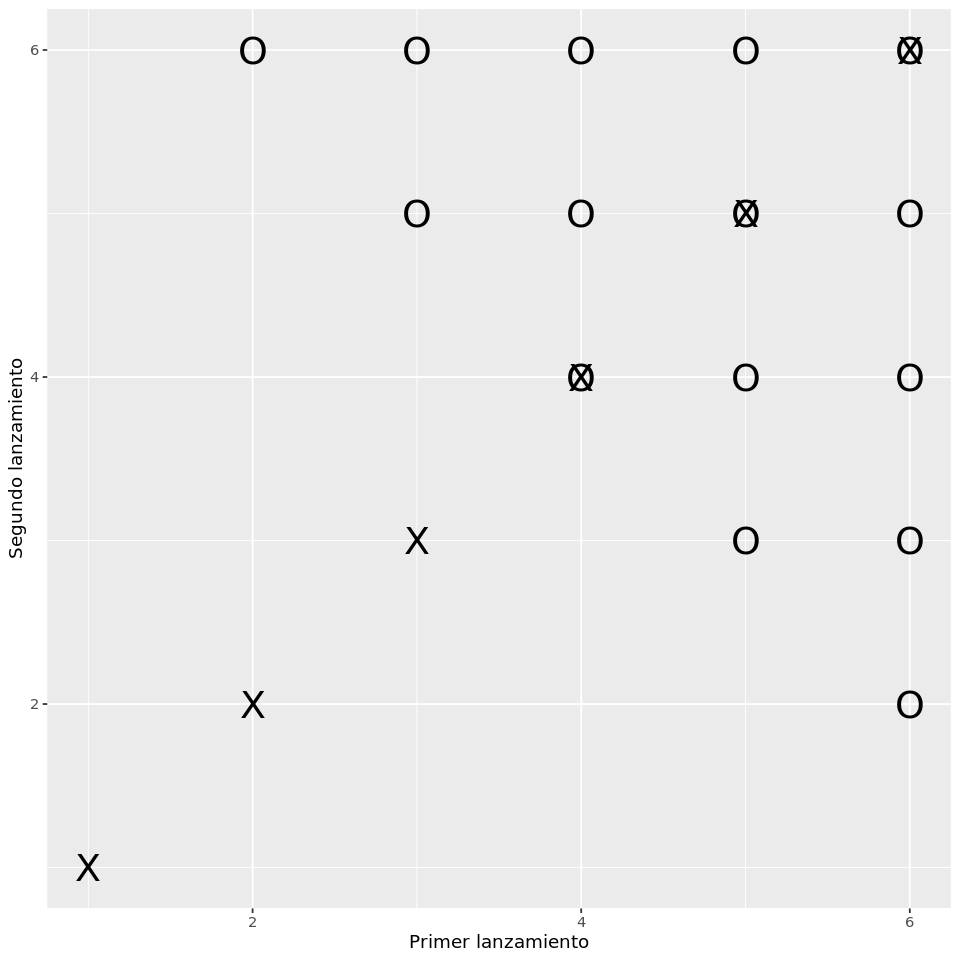

In [8]:
graf <- ggplot(rbind(E, F), aes(x=X1, y=X2, label=etiqueta)) #aes help us to map variables
                                                             #in the data frame to objects
                                                             #in the graph

graf + 
geom_text(size = 8) + 
xlab("Primer lanzamiento") + ylab("Segundo lanzamiento")
                                                            

Entonces: $P(E) = \frac{6}{36}$, $P(F)=\frac{15}{36}$, $P(E \cap F) =\frac{3}{36}$, $P(E|F) = \frac{3}{15}$, $P(F|E)=\frac{3}{6}$.

**Otra opción podría ser:**

In [9]:
S <- rolldie(2, makespace = TRUE)  # se asume el modelo equiprobable

In [10]:
head(S)

,X1,X2,probs
,<int>,<int>,<dbl>
1,1,1,0.02777778
2,2,1,0.02777778
3,3,1,0.02777778
4,4,1,0.02777778
5,5,1,0.02777778
6,6,1,0.02777778


In [12]:
#Eventos
E <- subset(S, X1 == X2)
F <- subset(S, X1 + X2 >= 8)
Prob(E, given = F) #this one also could be computed as: Prob(S, X1==X2, given = (X1 + X2 >= 8))
                   #using same S
Prob(F, given = E) #this one also could be computed as: Prob(S, X1+X2 >= 8, given = (X1==X2))
                   #using same S

[1] 0.2

[1] 0.5

## Propiedades y reglas

Las probabilidades condicionales se comportan como probabilidades sin condicionar:

Para cualquier evento $E$ fijo con $P(E)>0$ se tiene:

1) $P(F|E) \geq 0$, para todos los eventos $F \in S$.

2) $P(S|E) = 1$.

3) Si los eventos $F_1, F_2, F_3, \dots $ son ajenos entonces:

$P(\displaystyle \cup_{i=1}^n F_i | E ) =  \sum_{i=1}^nP(F_i | E)$ para toda $n$ y aún más: $P(\displaystyle \cup_{i=1}^\infty F_i| E ) = \sum_{i=1}^\infty P(F_i|E)$

Y se tienen las siguientes propiedades:

1)  $P(F^c | E) = 1-P(F|E)$.

2) Si $F \subset G$ entonces $P(F|E) \leq P(G|E)$.

3) $P(F \cup G|E) = P(F|E) + P(G|E) - P(F \cap G|E)$ 

4) La **regla de la multiplicación** para cualquier par de eventos $E, F$: $P(E \cap F) = P(E|F)P(F) = P(F|E)P(E)$ y en general: $P(\displaystyle \cap_{i=1}^n E_i) = P(E_1)P(E_2|E_1)P(E_3|E_1 \cap E_2) \cdots P(E_n |\displaystyle \cap_{i=1}^{n-1} E_i)$

### Ejemplos de la regla de la multiplicación


1)**Problema:** calcular la probabilidad de extraer $2$ aces de una baraja.

**Solución:**

Si $E=${extraer un as} y $F=${extraer un as} entonces $P(E\cap F)=P(E|F)P(F) = \frac{3}{51} \cdot \frac{4}{52}  \approx 0.00452$

#### En R ...

In [13]:
L <- cards() #this one is a dataframe
head(L)

,rank,suit
,<fct>,<fct>
1,2,Club
2,3,Club
3,4,Club
4,5,Club
5,6,Club
6,7,Club


Usamos la función de [urnsamples](https://www.rdocumentation.org/packages/prob/versions/1.0-1/topics/urnsamples) aplicada al `dataframe` anterior que permite realizar la extracción de dos renglones (canicas) 

In [14]:
M <- urnsamples(L, size = 2, replace=F, ordered = F) #no replacement, no order

$M$ es una lista de una dimensión que contiene todas las combinaciones posibles de pares de renglones del data frame $L$. La cantidad de combinaciones de pares de renglones es $\binom{52}{2}:$

In [15]:
class(M)

[1] "list"

In [16]:
NCOL(M)

[1] 1

In [17]:
NROW(M)

[1] 1326

In [18]:
choose(52,2) #just to check number of possible pairs

[1] 1326

In [19]:
head(M)

,rank,suit
,<fct>,<fct>
1,2,Club
2,3,Club
,rank,suit
,<fct>,<fct>
1,2,Club
3,4,Club
,rank,suit
,<fct>,<fct>
1,2,Club


Accedemos a su primer elemento de la lista M con doble corchete:

In [20]:
M[[1]]

,rank,suit
,<fct>,<fct>
1,2,Club
2,3,Club


Calculamos el espacio de probabilidad del dataframe `M` con [probspace](https://www.rdocumentation.org/packages/prob/versions/1.0-1/topics/probspace):

In [21]:
N <- probspace(M) #equally likely model by default

$N$ es una lista de dimensión igual a dos y cada dimensión tiene un nombre. Se utiliza `attributes` para revisar sus nombres: 

In [22]:
print(attributes(N))

$names
[1] "outcomes" "probs"   

$class
[1] "ps"   "list"



**Obs:** `ps` es clase *probability space* definida en el paquete `prob`.

Y obtenemos los nombres de las dos dimensiones con `names` y el símbolo de dólar:

In [23]:
print(attributes(N)$names) 

[1] "outcomes" "probs"   


En la primera dimensión, *outcomes*, el *data frame* `N` tiene $\binom{52}{2} = 1326$ data frames y cada data frame tiene 2 renglones:

In [24]:
length(N$outcomes)

[1] 1326

Esta dimensión *outcomes* es una lista:

In [25]:
class(N$outcomes)

[1] "list"

Contenido de $N$ en el nombre *outcomes*:

In [27]:
N$outcomes[1]

,rank,suit
,<fct>,<fct>
1,2,Club
2,3,Club


In [28]:
N$outcomes[100]

,rank,suit
,<fct>,<fct>
2,3,Club
51,K,Spade


Cada renglón representa el par de cartas elegidas.

La segunda dimensión, *probs*, tiene $\binom{52}{2} = 1326$ probabilidades:

In [29]:
length(N$probs)

[1] 1326

Esta dimensión *probs* es un vector numérico:

In [30]:
class(N$probs)

[1] "numeric"

Cada probabilidad igual a $\frac{1}{\binom{52}{2}}$ que es la probabilidad de extraer dos cartas cualesquiera:

In [31]:
1/choose(52,2)

[1] 0.0007541478

Por ejemplo:

In [32]:
N$probs[1]

[1] 0.0007541478

In [33]:
N$probs[100]

[1] 0.0007541478

**Y la probabilidad deseada: $P(E\cap F) = P(${extraer dos aces}$)$ es**:

In [36]:
Prob(N, all(rank == 'A')) #Prob asume modelo equiprobable
                          # el evento es all(rank == 'A') y como son dos cartas extraídas, 
                          #entonces ambas deben ser iguales a A

[1] 0.004524887

donde utilizamos la función [Prob](https://www.rdocumentation.org/packages/prob/versions/1.0-1/topics/prob) en la que se asume un modelo equiprobable. En el primer argumento pasamos un *probability space* y en el segundo argumento pasamos el evento `all(rank == 'A')`, utilizamos la función de [all](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/all) pues ambas cartas deben ser iguales a `A`.

Por ejemplo el siguiente índice no se toma en cuenta:

In [35]:
N$outcomes[12]

,rank,suit
,<fct>,<fct>
1,2,Club
13,A,Club


Pero este sí:

In [36]:
N$outcomes[559]

,rank,suit
,<fct>,<fct>
13,A,Club
26,A,Diamond


2) **Problema:** considérese una urna con $10$ canicas: $7$ son rojas y $3$ son verdes y se seleccionan $3$ canicas. Sea $E=${primer canica es roja}, $F=${segunda canica es roja} y $G=${tercera canica es roja}. Calcular $P(E \cap F \cap G)$.

**Solución:**

$P(E\cap F\cap G) = \frac{\binom{7}{3}}{\binom{10}{3}}$

In [37]:
choose(7,3)/choose(10,3)

[1] 0.2916667

#### En R ...

In [38]:
L <- rep(c("red","green"), times = c(7,3)) #L represents the urn, its a vector
print(L)

 [1] "red"   "red"   "red"   "red"   "red"   "red"   "red"   "green" "green"
[10] "green"


Ver [rep](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/rep).

Usamos nuevamente [urnsamples](https://www.rdocumentation.org/packages/prob/versions/1.0-1/topics/urnsamples) para obtener el espacio de resultados en un *data frame*:

In [40]:
M <- urnsamples(L, size = 3, replace = FALSE, ordered = TRUE)
#ordered because red, green, red is different from green, red, red
#as we are enumerating the drawings from the urn of marbles

Número de renglones y columnas del *data frame* `M`:

In [41]:
NROW(M)

[1] 720

In [42]:
NCOL(M)

[1] 3

Algunos renglones:

In [43]:
M[35:40,]

,X1,X2,X3
,<fct>,<fct>,<fct>
35,red,green,red
36,red,red,green
37,red,red,green
38,red,green,red
39,green,red,red
40,green,red,red


Calculamos el espacio de probabilidad del dataframe `M` con [probspace](https://www.rdocumentation.org/packages/prob/versions/1.0-1/topics/probspace):

In [44]:
N <- probspace(M) #equally likely model by default

A cada renglón de `M`, *outcomes*, se le asocia un vector de probabilidades con lo que se tiene un *data frame*: `N`, que es un espacio de probabilidad.

In [45]:
NROW(N)

[1] 720

In [46]:
NCOL(N)

[1] 4

Para calcular entonces la probabilidad pedida:

In [48]:
Prob(N, isrep(N, vals='red', nrep=3))

[1] 0.2916667

Ver [isrep](https://www.rdocumentation.org/packages/prob/versions/1.0-1/topics/isrep) del paquete `prob`.

**Obs:** lo anterior equivale a hacer: 

```
Prob(N, X1 =='red'& X2 =='red' & X3 =='red')
#o bien:
sum(N[with(
           N,isrep(N, 'red', 3)
           ),]$probs
    )
```

**(Tarea en compu) Ejercicio: calcular la probabilidad de:**

* extraer dos canicas rojas

* extraer roja, verde, roja (en este orden)

* extraer roja, verde, roja (no importa el orden)

## (Tarea) Ejercicios

**Nota: Varios de los siguientes ejercicios tienen su solución en las referencias dadas al inicio de la nota. Se sugiere resolverlos por su cuenta y posteriormente compararlos con sus respectivas soluciones.**

1) Supongamos que en una muestra de 100 personas, 65 de ellas son vacunadas contra la influenza esta temporada de invierno. Cinco de las personas vacunadas contraen la enfermedad. De las 35 personas que no son vacunadas 25 caen enfermas. La siguiente tabla resume esta información:

|----|enfermo|no enfermo|Total|
|:---:|:---:|:---:|:---:|
|vacunados|5|60|65|
|no vacunados|25|10|35|
|Total|30|70|100

Calcular:

a) $P(${vacunado}$)$, $P(${no vacunado}$)$, $P(${enfermo|vacunado}$)$, $P(${no enfermo|vacunado}$)$, $P(${enfermo|no vacunado}$)$, $P(${no enfermo|no vacunado}$)$ y $P(${vacunado y no enfermo}$)$. 

b)$P(${no vacunado y no enfermo}$)$, $P(${no enfermo}$)$

c)$P(${vacunado} | {no enfermo}$)$.



2) Considérese dos urnas, la primera tiene $5$ canicas rojas y $3$ canicas verdes y la segunda $2$ canicas rojas y $6$ verdes. Una persona selecciona una canica de la primer urna y la transfiere a la segunda urna sin mostrarte qué color fue. Seleccionas una canica de la segunda urna. ¿Cuál es la probabilidad que la canica que seleccionaste es roja?. 

Sugerencia: considérese los eventos: $E=${la canica que se lleva de la primer urna a la segunda urna es roja} y $F=${la canica seleccionada es roja} y condicionar sobre $E$, lo que se pide es $P(F)$.

3) Considérese la siguiente tabla:


|Fuma/No Fuma|Femenino|Masculino|Suma
|:----:|:----:|:----:|:----:|
|No fuma|61|75|136
|Fuma|9|23|32
|Suma|70|98|168

Calcular:

a) $P(\text{\{Femenino\}}), P(\text{\{Fuma\}})$.

b) Supóngase que una persona deja de fumar pero no se sabe su género. Si se selecciona una persona no fumadora aleatoriamente, calcular $P(\text{\{Femenino\}})$. 

Sugerencia: para el inciso b piénsese este problema como el de tener dos urnas, cada urna con canicas rojas y verdes como en el ejercicio anterior. La urna 1 y la urna 2 representan fumar y  no fumar respectivamente y las canicas rojas y verdes representan Femenino y Masculino respectivamente. Además, considérese los eventos: $E=${mujer deja de fumar} y usar la regla de probabilidad total condicionando sobre $E$.